In [31]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split                                # разделяем выборку на тренировочную и тестовую
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis                # импортируем LDA-функционал
import matplotlib.pyplot as plt
from matplotlib import colors

In [12]:
# Загружаем набор данных Ирисы:
iris = load_iris()

In [46]:
df_x = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
df_x.rename(columns = {'sepal length (cm)':'sepal_length_(cm)', 'sepal width (cm)':'sepal_width_(cm)'}, inplace = True)
df_y = iris.target

In [64]:
# разделяем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25)

In [65]:
# Строим LDA модель

In [66]:
lda = LinearDiscriminantAnalysis()

In [67]:
lda.fit(X_train, y_train)                 # обучаем модель

LinearDiscriminantAnalysis()

In [68]:
lda.predict(X_test)                         # у предсказанные

array([2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 1,
       0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))                 # точность модели

0.868421052631579

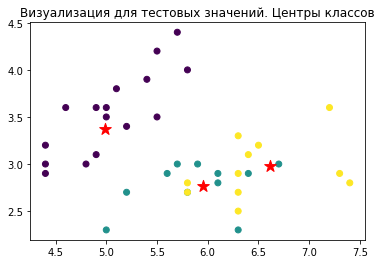

In [74]:
plt.scatter(X_test['sepal_length_(cm)'], X_test['sepal_width_(cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title('Визуализация для тестовых значений. Центры классов')
plt.show()

In [75]:
# Кластеризация

In [107]:
from sklearn.preprocessing import StandardScaler                     # для масштабирования
from sklearn.cluster import KMeans                                   # метод К-средних

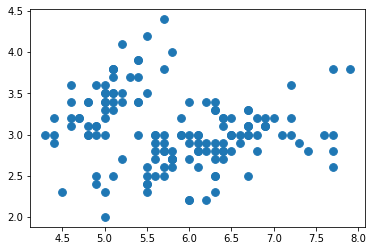

In [85]:
plt.scatter(df_x['sepal_length_(cm)'], df_x['sepal_width_(cm)'], cmap='autumn', s=60)

In [ ]:
# приводим к "одному" масштабу.

In [87]:
scaler = StandardScaler()

In [90]:
df_x_scaled = scaler.fit_transform(df_x)

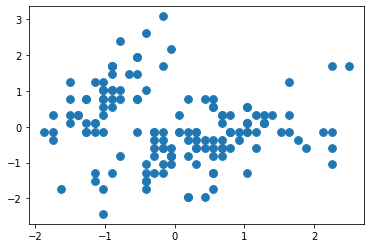

In [93]:
plt.scatter(df_x_scaled[:, 0], df_x_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
# кластеризация. метод К-средних для изначальных данных (зачения близкие, имеет ли смысл масштабировать?)

In [122]:
kmeans = KMeans(n_clusters=3)                            # n_clusters количество кластеров
clusters = kmeans.fit_predict(df_x)                      # fit_predict -метод для обучения
clusters                                                 # каждому значению присваивает свой кластер

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

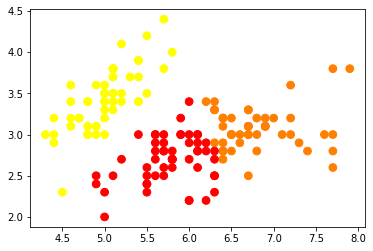

In [123]:
plt.scatter(df_x['sepal_length_(cm)'], df_x['sepal_width_(cm)'], cmap='autumn', c=clusters, s=60)

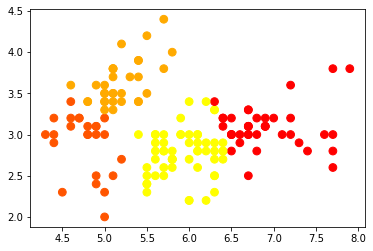

In [125]:
kmeans = KMeans(n_clusters=4)                            
clusters = kmeans.fit_predict(df_x)
plt.scatter(df_x['sepal_length_(cm)'], df_x['sepal_width_(cm)'], cmap='autumn', c=clusters, s=60)

In [94]:
# кластеризация. метод К-средних, для масштабов

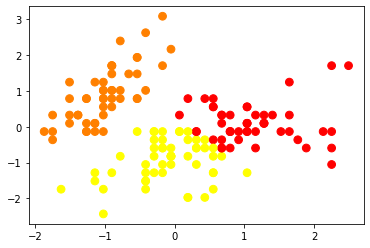

In [124]:
# n_clusters=3
kmeans = KMeans(n_clusters=3)                            
clusters = kmeans.fit_predict(df_x_scaled)               
plt.scatter(df_x_scaled[:, 0], df_x_scaled[:, 1], cmap='autumn', c=clusters, s=60)

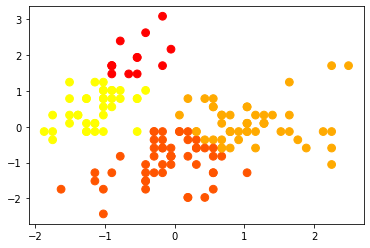

In [112]:
# n_clusters=4
kmeans = KMeans(n_clusters=4)                            
clusters = kmeans.fit_predict(df_x_scaled)  
plt.scatter(df_x_scaled[:, 0], df_x_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [ ]:
# На первый взгляд различия минимальны. Можно было не масштабировать

In [130]:
# График локтя
k_inertia = []                                     # создаем список для инерции
ks = range(1, 20)                                  # задаем диапазон кластеров

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_x_scaled)
#     clusters_kmeans = clf_kmeans.fit_predict(df_x)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

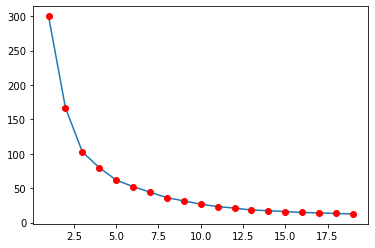

In [131]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
# По графику я бы предположила, что оптимальное число кластеров 3 или 4, но в случае с n_clusters=3 
# кластеризация на мой взгляд выглядит удачнее, выше приведены обе